In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [40]:
df = pd.read_csv('cluster_dens.csv')

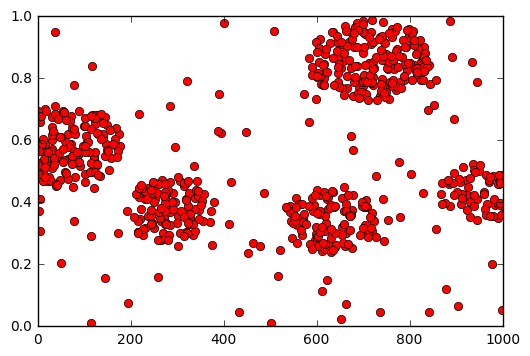

In [41]:
plt.plot(df.x, df.y, 'ro')
plt.show()

In [42]:
scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

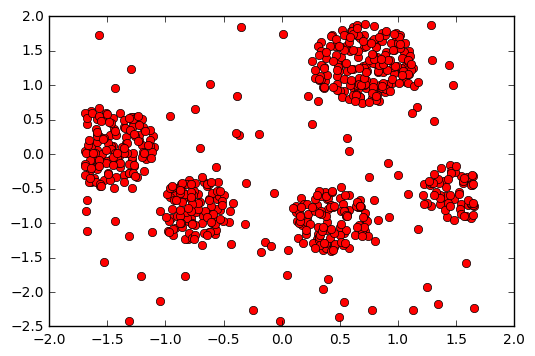

In [43]:
plt.plot(np.transpose(X)[0], np.transpose(X)[1], 'ro')
plt.show()

In [44]:
dbscan = DBSCAN(eps = 0.18, min_samples = 7)
dbscan = dbscan.fit(X)
df['label'] = dbscan.labels_

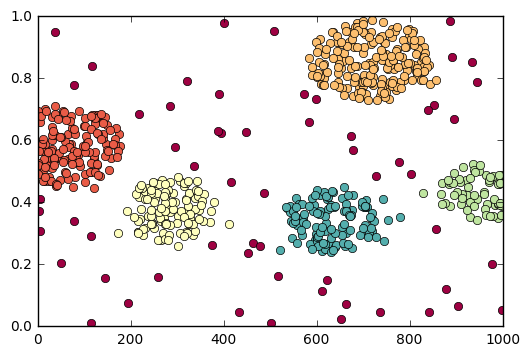

In [45]:
cmap = cm.get_cmap('Spectral')
for label in set(dbscan.labels_):
    label = label + 1
    to_plot = df.loc[df.label + 1 == label, :]
    plt.plot(to_plot.x, to_plot.y, 'o',color = cmap(label/len(set(dbscan.labels_))))

plt.show()

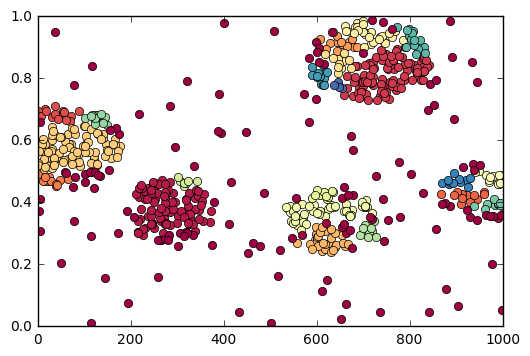

In [46]:
dbscan = DBSCAN(eps = 0.1, min_samples = 7)
dbscan = dbscan.fit(X)
df['label2'] = dbscan.labels_
cmap = cm.get_cmap('Spectral')
for label in set(dbscan.labels_):
    label = label + 1
    to_plot = df.loc[df.label2 + 1 == label, :]
    plt.plot(to_plot.x, to_plot.y, 'o',color = cmap(label/len(set(dbscan.labels_))))

plt.show()

In [33]:
print('score clustering 1: ', silhouette_score(df.loc[df.label >= 0, ['x', 'y']], df.loc[df.label >= 0, 'label']))
print('score clustering 2: ', silhouette_score(df.loc[df.label2 >= 0, ['x', 'y']], df.loc[df.label2 >= 0, 'label2']))

score clustering 1:  0.44340358318
score clustering 2:  -0.25370067211
